In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dataset=pd.read_csv("/content/HBA Dataset.csv")

In [ ]:
dataset.columns

Index(['Frequency, in Hertzs.', 'Angle of attack, in degrees.',
       'Chord length, in meters.',
       '. Free-stream velocity, in meters per second.',
       'Suction side displacement thickness, in meters.',
       'Scaled sound pressure level, in decibels.'],
      dtype='object')

In [ ]:
dataset.dtypes

Frequency, in Hertzs.                                int64
Angle of attack, in degrees.                       float64
Chord length, in meters.                           float64
. Free-stream velocity, in meters per second.      float64
Suction side displacement thickness, in meters.    float64
Scaled sound pressure level, in decibels.          float64
dtype: object

In [ ]:
dataset.head()

,"Frequency, in Hertzs.","Angle of attack, in degrees.","Chord length, in meters.",". Free-stream velocity, in meters per second.","Suction side displacement thickness, in meters.","Scaled sound pressure level, in decibels."
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [ ]:
dataset.tail()

,"Frequency, in Hertzs.","Angle of attack, in degrees.","Chord length, in meters.",". Free-stream velocity, in meters per second.","Suction side displacement thickness, in meters.","Scaled sound pressure level, in decibels."
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


In [ ]:
dataset.shape

(1503, 6)

In [ ]:
dataset.describe()

,"Frequency, in Hertzs.","Angle of attack, in degrees.","Chord length, in meters.",". Free-stream velocity, in meters per second.","Suction side displacement thickness, in meters.","Scaled sound pressure level, in decibels."
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


<AxesSubplot:>

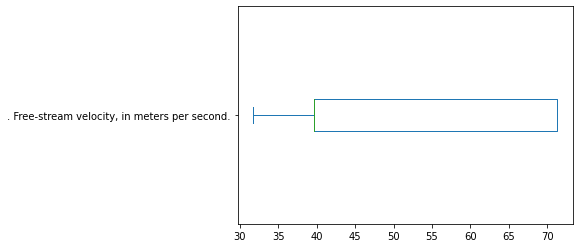

In [ ]:
dataset['. Free-stream velocity, in meters per second.'].plot(kind='box',vert = False)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


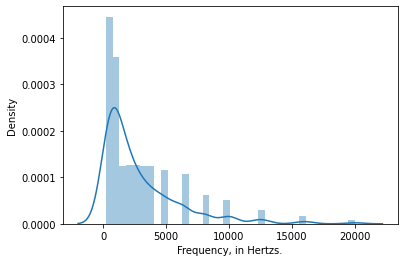

In [ ]:
sns.distplot(a=dataset['Frequency, in Hertzs.'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


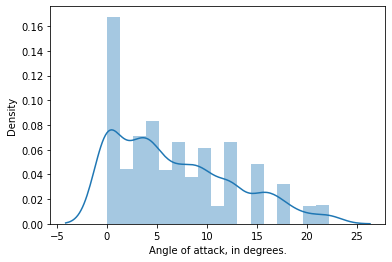

In [ ]:
sns.distplot(a=dataset['Angle of attack, in degrees.'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


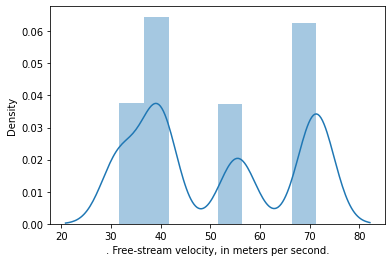

In [ ]:
sns.distplot(a=dataset['. Free-stream velocity, in meters per second.'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


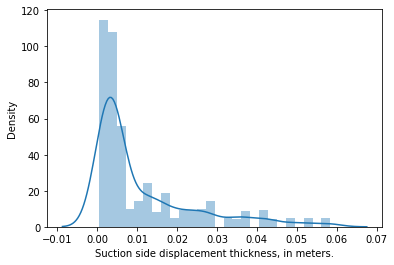

In [ ]:
sns.distplot(a=dataset['Suction side displacement thickness, in meters.'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


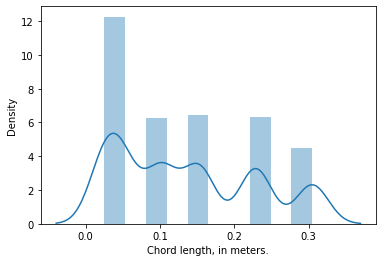

In [ ]:
sns.distplot(a=dataset['Chord length, in meters.'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


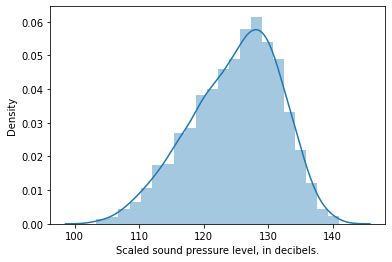

In [ ]:
sns.distplot(a=dataset['Scaled sound pressure level, in decibels.'])
plt.show()

<AxesSubplot:>

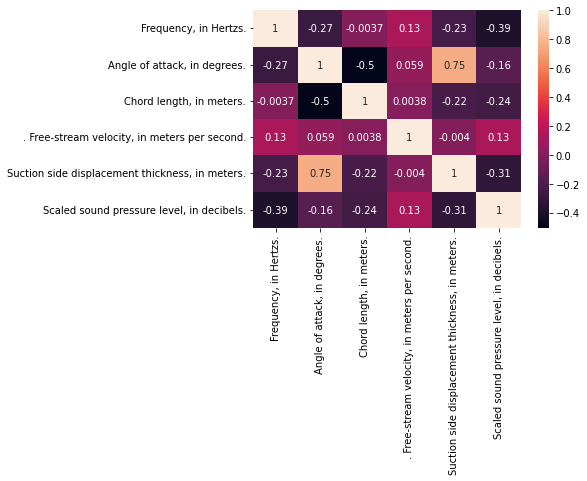

In [ ]:
sns.heatmap(dataset[['Frequency, in Hertzs.', 'Angle of attack, in degrees.',
       'Chord length, in meters.',
       '. Free-stream velocity, in meters per second.',
       'Suction side displacement thickness, in meters.',
       'Scaled sound pressure level, in decibels.']].corr(),annot=True)

In [ ]:
# Split df into dependent(y) and indepedent variables(X)
X = dataset.drop('Scaled sound pressure level, in decibels.',axis=1)
y = dataset['Scaled sound pressure level, in decibels.']

Linear Regression With 60:40 Ratio


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
reg=LinearRegression()    #instantiating linear regression
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print(metrics.mean_absolute_error(y_test,y_pred))

3.7496430404563235


Decision Tree With 60:40 Ratio



In [ ]:
tree = DecisionTreeRegressor(max_depth=3, random_state=50)
b = tree.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, b.predict(X_test))
mae

4.093951044982119

Linear Regression With 70:30 Ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
y_pred = reg.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred))


3.7942490652054612


Decision Tree With 70:30 Ratio

In [ ]:
tree = DecisionTreeRegressor(max_depth=3, random_state=50)
b = tree.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, b.predict(X_test))
mae

4.1171322081768436

Linear Regression With 75:25 Ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
y_pred = reg.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred))

3.77218432212351


Decision Tree With 75:25 Ratio

In [ ]:
tree = DecisionTreeRegressor(max_depth=3, random_state=50)
b = tree.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, b.predict(X_test))
mae

4.020393852332393

Linear Regression With 80:20 Ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
y_pred = reg.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred))

3.843626865466139


Decision Tree With 80:20 Ratio

In [ ]:
tree = DecisionTreeRegressor(max_depth=3, random_state=50)
b = tree.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, b.predict(X_test))
mae

4.013160706898263